**Import Library**

In [1]:
# import tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**Import Data**

In [2]:
# import data
""" File database """
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Colab Notebooks/ML_2_Fellow.csv"

data = pd.read_csv(path,encoding= 'iso-8859-1')

df = data.copy()
df.tail(125)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
541784,581578,22991,GIRAFFE WOODEN RULER,12.0,12/9/2011 12:16,1.95,12713.0,Germany
541785,581578,23229,VINTAGE DONKEY TAIL GAME,6.0,12/9/2011 12:16,3.75,12713.0,Germany
541786,581578,22622,BOX OF VINTAGE ALPHABET BLOCKS,6.0,12/9/2011 12:16,11.95,12713.0,Germany
541787,"581578,21506,""FANCY FONT BIRTHDAY CARD, "",12,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541788,581578,21507,ELEPHANT BIRTHDAY CARD,12.0,12/9/2011 12:16,0.42,12713.0,Germany
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


**Cek Data**

In [3]:
# lihat ukuran
df.shape

(541909, 8)

In [4]:
#lihat tipe data dan jumlah data yang tidak lengkap
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        535874 non-null  object 
 2   Barang             534420 non-null  object 
 3   Jumlah             535874 non-null  float64
 4   Tanggal_Transaksi  535874 non-null  object 
 5   Harga_Satuan       535874 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


In [5]:
# cek null data
df.isnull().sum()

Kode_Bayar                0
Kode_Barang            6035
Barang                 7489
Jumlah                 6035
Tanggal_Transaksi      6035
Harga_Satuan           6035
Kode_Pelanggan       138727
Negara                 6035
dtype: int64

**Preprocessing**
Untuk kebutuhan case study, dimana :
1. yang mau di aggregate adalah jumlah penjualan (jumlah * harga_satuan)
2. tidak ada orang bisnis yang bisa ditanya kenapa nilainya  NaN
3. nilai kuantiti negatif adalah untuk barang yang di cancel (kode bayar CXXXXXX)

maka hanya kolom jumlah dan harga_satuan yang di dropna

In [6]:
# Mengkonversi  empty string menjadi null
df = df.replace('', np.nan)

# using dropna() function
# 'Membuang' semua baris yang memiliki null data di pada kolom Jumlah dan Harga_satuan 
df2 = df.dropna(subset=['Jumlah', 'Harga_Satuan'])

In [7]:
# cek null data
df2.isnull().sum()

Kode_Bayar                0
Kode_Barang               0
Barang                 1454
Jumlah                    0
Tanggal_Transaksi         0
Harga_Satuan              0
Kode_Pelanggan       132692
Negara                    0
dtype: int64

**1. What items customers buy the most and are there any items we should ignore**

In [8]:
#buat kolom total
df2['Total'] = df2['Jumlah'] * df2['Harga_Satuan']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Item yang banyak dibeli adalah DOTCOM POSTAGE dengan total penjualan 206248.77

catatan:
- nilai didapat dengan tetap menghitung jumlah negatif (kemungkinan retur)
- urutan paling besar dari kolom Total per Barang

In [9]:
df2.groupby('Barang')['Total'].sum().sort_values(ascending=False).head(5)

Barang
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
Name: Total, dtype: float64

Item yang  bisa di ingnore adalah PADS TO MATCH ALL CUSHIONS dengan total penjualan 0.003

catatan:
-  nilai didapat dengan tanpa menghitung jumlah negatif (kemungkinan retur)
-  urutan paling kecil dari kolom Total per Barang

In [10]:
df2[df2['Total']>0].groupby('Barang')['Total'].sum().sort_values(ascending=True).head(5)

Barang
PADS TO MATCH ALL CUSHIONS         0.003
HEN HOUSE W CHICK IN NEST          0.420
SET 12 COLOURING PENCILS DOILEY    0.650
VINTAGE BLUE TINSEL REEL           0.840
PINK CRYSTAL GUITAR PHONE CHARM    0.850
Name: Total, dtype: float64

**2.What is our strategy to increase sales based on our export destination countries?**

Stretegi yang bisa digunakan adalah dengan melakukan export ke United Kingdom karena :
- Jumlah penjulan terbesar
- Jumlah pelanggan terbanyak
- frekuensi transaksi terbanyak

Jika ingin meningkatkan penjualan dengan memperluas pasar, produk yang dapat diperbanyak exportnya adalah WHITE HANGING HEART T-LIGHT HOLDER karena :
- Jumlah pelanggan terbanyak, artinya produk yang paling disukai
- Frekuensi transaksi terbanyak
- Top 5 jumlah item terjual terbanyak
- Top 3 total penjualan terbanyak

Namun jika ingin mencoba menaikan nilai penjualan saja dapat meningkatkan frekuensi transaksi REGENCY CAKESTAND 3 TIER karena :
- Top 2 total penjualan terbanyak
- Top 2 total pelanggan
- Top 3 frekuensi terbanyak
- Jumlah item terjual tidak masuk top 10, namun nilai penjualan besar


In [11]:
# cek total per negara
df2.groupby('Negara')['Total'].sum().sort_values(ascending=False).head(5)

Negara
United Kingdom    8.130586e+06
Netherlands       2.832391e+05
EIRE              2.616433e+05
Germany           2.207609e+05
France            1.970705e+05
Name: Total, dtype: float64

In [12]:
#cek jumlah pelanggan per negara
df2.groupby('Negara')['Kode_Pelanggan'].count().sort_values(ascending=False).head(5)

Negara
United Kingdom    358505
Germany             9448
France              8459
EIRE                7428
Spain               2513
Name: Kode_Pelanggan, dtype: int64

In [13]:
#cek frekuensi transaksi per negara
df2.groupby('Negara')['Kode_Bayar'].count().sort_values(ascending=False).head(5)

Negara
United Kingdom    489721
Germany             9448
France              8525
EIRE                8138
Spain               2513
Name: Kode_Bayar, dtype: int64

In [14]:
#cek Total penjualan Barang United Kingdom
df2[df2['Negara']=='United Kingdom'].groupby('Barang')['Total'].sum().sort_values(ascending=False).head(5)

Barang
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              134405.94
WHITE HANGING HEART T-LIGHT HOLDER     93953.07
PARTY BUNTING                          92501.73
JUMBO BAG RED RETROSPOT                84516.44
Name: Total, dtype: float64

In [15]:
#cek Frekuensi Transaksi Barang United Kingdom
df2[df2['Negara']=='United Kingdom'].groupby('Barang')['Kode_Bayar'].count().sort_values(ascending=False).head(5)

Barang
WHITE HANGING HEART T-LIGHT HOLDER    2271
JUMBO BAG RED RETROSPOT               2001
REGENCY CAKESTAND 3 TIER              1859
PARTY BUNTING                         1634
LUNCH BAG RED RETROSPOT               1460
Name: Kode_Bayar, dtype: int64

In [16]:
#cek Jumlah Barang United Kingdom
df2[df2['Negara']=='United Kingdom'].groupby('Barang')['Jumlah'].sum().sort_values(ascending=False).head(5)

Barang
WORLD WAR 2 GLIDERS ASSTD DESIGNS     48326.0
JUMBO BAG RED RETROSPOT               43167.0
POPCORN HOLDER                        34365.0
ASSORTED COLOUR BIRD ORNAMENT         33679.0
WHITE HANGING HEART T-LIGHT HOLDER    33193.0
Name: Jumlah, dtype: float64

In [17]:
#cek Jumlah Pelanggan per Barang United Kingdom
df2[df2['Negara']=='United Kingdom'].groupby('Barang')['Kode_Pelanggan'].count().sort_values(ascending=False).head(5)

Barang
WHITE HANGING HEART T-LIGHT HOLDER    1980
REGENCY CAKESTAND 3 TIER              1574
JUMBO BAG RED RETROSPOT               1505
ASSORTED COLOUR BIRD ORNAMENT         1343
PARTY BUNTING                         1327
Name: Kode_Pelanggan, dtype: int64

**3.	Do customer segmentation appropriately**

In [53]:
# aggregate pelanggan berdasarkan total penjulan, frekuensi transaksi
# ambil yang hanya total > 0 (transaksi penjualan saja) 
df3 = df2[df2['Total']>0].groupby('Kode_Pelanggan').agg(total = ('Total','sum'),frekuensi=('Kode_Bayar','count')).reset_index()

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336 entries, 0 to 4335
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kode_Pelanggan  4336 non-null   float64
 1   total           4336 non-null   float64
 2   frekuensi       4336 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 101.8 KB


In [43]:
df3.describe()

,Kode_Pelanggan,total,frekuensi
count,4336.000000,4336.000000,4336.000000
mean,15299.889530,2003.978479,90.937039
std,1721.578508,8592.904689,226.114121
min,12346.000000,2.900000,1.000000
25%,13812.750000,305.717500,17.000000
50%,15299.500000,667.975000,41.000000
75%,16778.250000,1653.507500,99.000000
max,18287.000000,278788.580000,7755.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


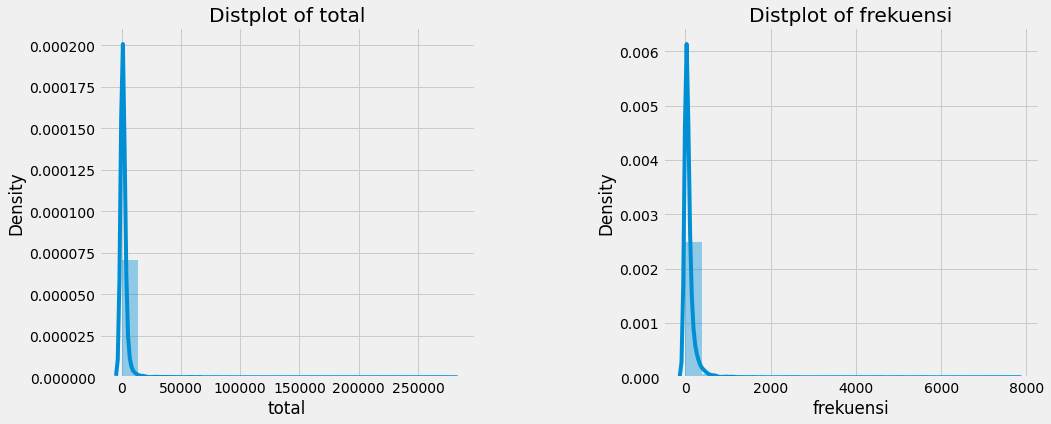

In [45]:
# amati masing-masing fitur
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['total','frekuensi']:
  n += 1
  plt.subplot(1 , 2 , n)
  plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
  sns.distplot(df3[x] , bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

In [47]:
# rancang K-Means untuk spending score vs annual income
# Kmeans, menentukan jumlah kluster dengan elbow
X1 = df3[['total','frekuensi']].iloc[: , :].values
inertia = [] #SSE
for n in range(1 , 15):
  algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 , max_iter=300, random_state= 111) )
  algorithm.fit(X1)
  inertia.append(algorithm.inertia_)

In [48]:
#cek nilai SSE
inertia[0]

320309415779.6533

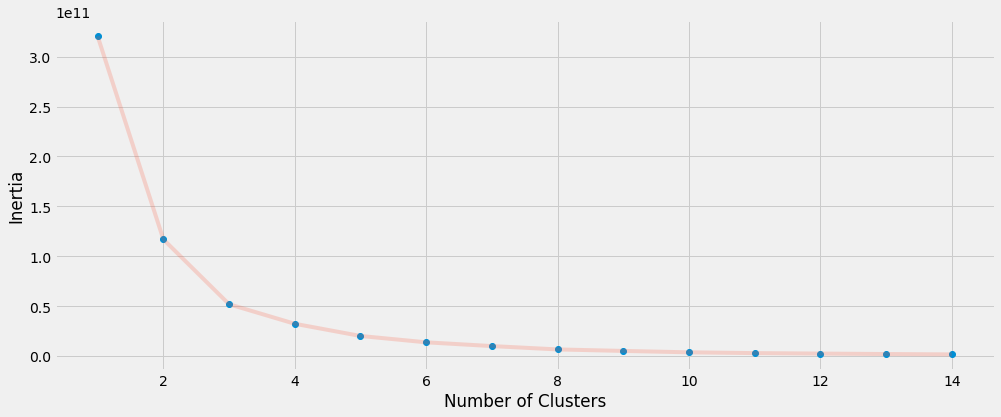

In [49]:
# plot elbow
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.2)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Total Cluster Pelanggan dengan menggunakan KMeans adalah sebanyak 3 cluster

In [50]:
# bangun K-Means dengan k =3 (berdasarkan gambar diatas)
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001, random_state= 111 , algorithm='elkan') )
algorithm.fit(X1)


KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

In [34]:
y_kmeans = algorithm.fit_predict(X1)

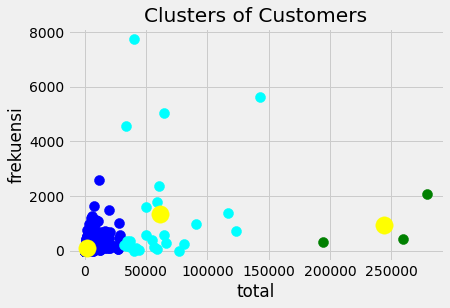

In [51]:
# Visualisasikan
plt.scatter(X1[y_kmeans==0, 0], X1[y_kmeans==0, 1], s=100, c='blue', label ='Cluster 1')
plt.scatter(X1[y_kmeans==1, 0], X1[y_kmeans==1, 1], s=100, c='green', label ='Cluster 2')
plt.scatter(X1[y_kmeans==2, 0], X1[y_kmeans==2, 1], s=100, c='cyan', label ='Cluster 3')

plt.scatter(algorithm.cluster_centers_[:, 0], algorithm.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('total')
plt.ylabel('frekuensi')
plt.show()

**Get the hidden insight from the data**

In [62]:
# barang paling banyak penjualannya
df2[df2['Total']>0].groupby('Barang')['Total'].sum().sort_values(ascending=False).head(5)

Barang
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174484.74
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
JUMBO BAG RED RETROSPOT                94340.05
Name: Total, dtype: float64

In [63]:
# barang paling sering di retur atau cancel
df2[df2['Total']<0].groupby('Barang')['Total'].sum().sort_values(ascending=True).head(5)

Barang
AMAZON FEE                       -235281.59
Manual                           -146784.46
MEDIUM CERAMIC TOP STORAGE JAR    -77479.64
Adjust bad debt                   -22124.12
POSTAGE                           -11871.24
Name: Total, dtype: float64

In [82]:
# transaksi nilai terbesar
df2['Total'].sort_values(ascending=False).head(5)

61619     77183.60
222680    38970.00
15017     13541.33
299982    11062.06
173382     8142.75
Name: Total, dtype: float64

In [77]:
# jumlah negara yang ada di dalam dataset
len(df['Negara'].unique())

39

In [78]:
# transaksi terbesar ada di Inggris namun diretur atau cancel
df2.groupby('Negara')['Total'].describe()

,count,mean,std,min,25%,50%,75%,max
Negara,,,,,,,,
Australia,1251.0,108.148449,158.659332,-425.00,16.5000,51.84,145.0000,1718.40
Austria,399.0,25.398446,34.647475,-21.25,13.5000,17.00,22.5000,360.00
Bahrain,19.0,28.863158,73.816333,-205.74,17.7000,25.50,34.8000,205.74
Belgium,2060.0,19.771350,15.575826,-19.95,13.0000,16.60,20.4000,165.00
Brazil,32.0,35.737500,32.896282,15.00,16.5000,19.65,47.4750,175.20
Canada,147.0,24.487619,61.925670,2.50,10.5000,16.50,19.8000,550.94
Channel Islands,753.0,26.494741,39.853356,-293.00,15.0000,17.70,25.2000,408.00
Cyprus,615.0,20.798878,34.234603,-320.69,9.9500,15.90,22.5000,320.69
Czech Republic,30.0,23.590667,26.302604,-35.76,15.6000,25.30,39.7800,70.80


In [70]:
# pelanggan yang sering transaksi
df2.groupby('Kode_Pelanggan')['Kode_Bayar'].count().sort_values(ascending=False).head(5)

Kode_Pelanggan
17841.0    7890
14911.0    5861
14096.0    5038
12748.0    4602
14606.0    2667
Name: Kode_Bayar, dtype: int64